# 1 Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Načtení připravený dat z numpy souboru
my_arrays = np.load("iris_numpy.npz")
X = my_arrays['arr_0']
Y = my_arrays['arr_1']
X_features = my_arrays['arr_2']

In [3]:
# Rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2)

In [4]:
# Načtení encoderu a scaleru
import joblib
scaler=joblib.load('classification_std_scaler.bin')
encoder=joblib.load('classification_encoder.bin')

## 1.1 Trénování modelu

In [5]:
# vytvoření a natrénovaání lineárního SVM modelu
from sklearn import svm

svm_model = svm.SVC(kernel = 'linear', random_state = 0)
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [6]:
# Spuštění modelu na testovacích datech
Y_pred = svm_model.predict(X_test)

## 1.2 Ověření modelu

In [7]:
# Výpočet správnosti 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_model, X = X_train, y = Y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.83 %
Standard Deviation: 2.64 %


<Axes: >

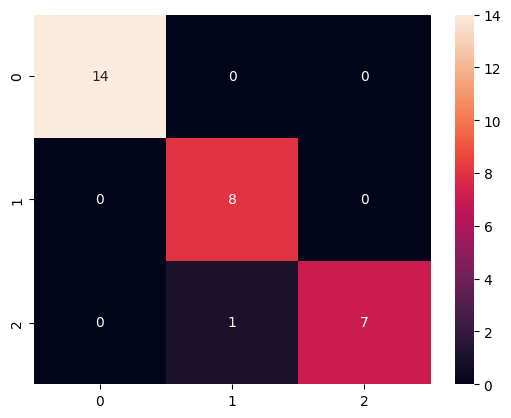

In [8]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True)

In [9]:
# Skóre
accuracy_score(Y_test, Y_pred)

0.9666666666666667

## 1.3 Vizualizace modelu

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay

In [11]:
# Výpis support vektorů
svm_model.support_vectors_

array([[1.9, 0.4],
       [4.9, 1.5],
       [5.1, 1.6],
       [4.8, 1.4],
       [4.7, 1.5],
       [4.7, 1.6],
       [4.5, 1.6],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.6, 1.5],
       [3. , 1.1],
       [5. , 1.7],
       [4.5, 1.5],
       [5.8, 1.6],
       [5.1, 1.9],
       [5. , 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.5],
       [4.5, 1.7],
       [4.8, 1.8],
       [4.9, 1.8],
       [5. , 1.9],
       [4.9, 2. ]])

In [12]:
def SVM_vizualization (svm_model, X, Y, title, xlabel, ylabel):
    # Zobrazení hranic rozhodování
    disp = DecisionBoundaryDisplay.from_estimator(
        svm_model,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,        
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    

    # Zobrazení bodů
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # Zobrazení support vektorů - větší kroužky
    try:
        plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1] , s=40, edgecolors="k", facecolors='none')
    except:
        pass

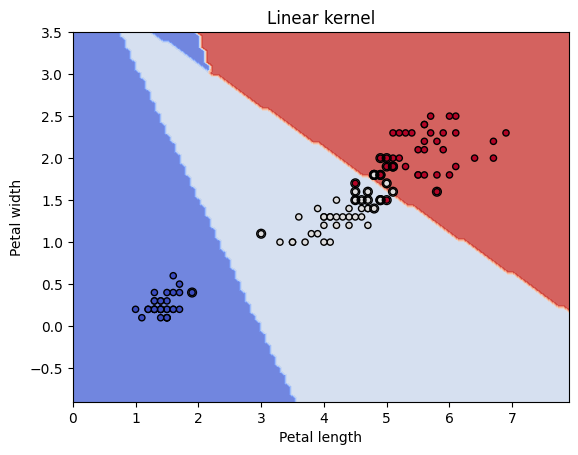

In [13]:
SVM_vizualization (svm_model, X_train, Y_train, "Linear kernel", "Petal length", "Petal width")

## 1.4 Jiné kernely

In [14]:
# C je citlivost margin na vzdalenost bodu, definuje penaltu, pokud je nějaký bod špatně zařazený
C = 1.0  # SVM regularization parameter

Score: 0.9


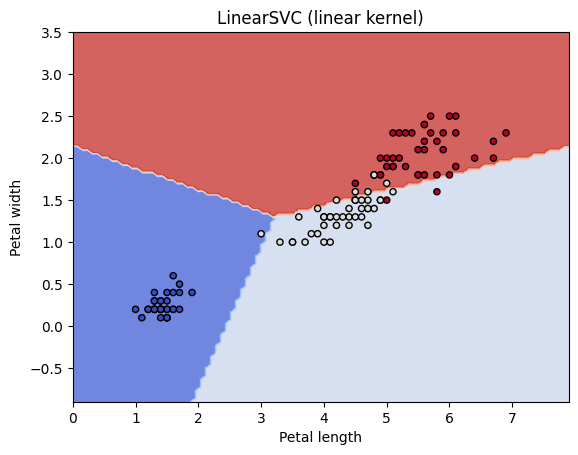

In [15]:
svm_linearsvc=svm.LinearSVC(C=C, max_iter=10000)
svm_linearsvc.fit(X_train, Y_train)
SVM_vizualization (svm_linearsvc, X_train, Y_train, "LinearSVC (linear kernel)", "Petal length", "Petal width")
print (f"Score: {svm_linearsvc.score(X_test, Y_test)}")

Score: 0.9666666666666667


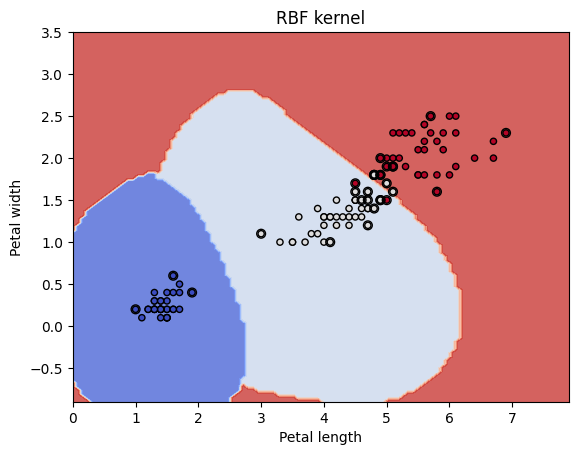

In [16]:
# Vytvoření různých instalcí SVM modelů s různými kernely 
# C je citlivost margin na vzdalenost bodu, definuje penaltu, pokud je nějaký bod špatně zařazený
C = 1.0  # SVM regularization parameter
svc_rbf=svm.SVC(kernel="rbf", gamma=0.7, C=C)
svc_rbf.fit(X_train, Y_train)
SVM_vizualization (svc_rbf, X_train, Y_train, "RBF kernel", "Petal length", "Petal width")
print (f"Score: {svc_rbf.score(X_test, Y_test)}")

Score: 0.9333333333333333


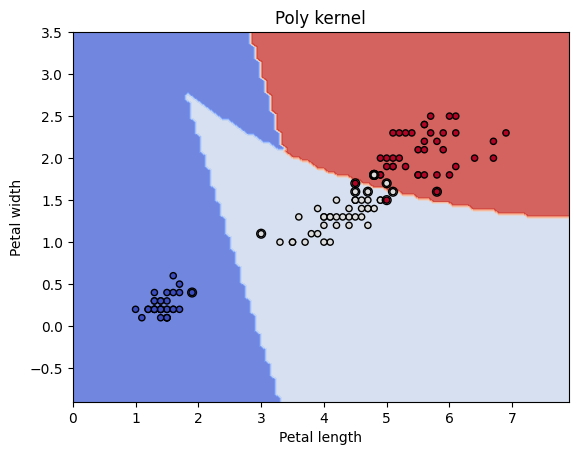

In [17]:
svc_poly=svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
svc_poly.fit(X_train, Y_train)
SVM_vizualization (svc_poly, X_train, Y_train, "Poly kernel", "Petal length", "Petal width")
print (f"Score: {svc_poly.score(X_test, Y_test)}")

## 1.5 Hyperparametry

In [18]:
from sklearn.model_selection import GridSearchCV
svc=svm.SVC()
params=[
    {"kernel": ["poly"], "C":[1, 5, 10, 50], "degree":[1,2,3,4], "gamma":[0.1, 0.3, 0.7, 1, 5]},
    {"kernel": ["rbf"], "C":[1, 5, 10, ], "gamma":[0.1, 0.5, 1, 5]},    
]

In [19]:
clf=GridSearchCV(estimator=svc, param_grid=params, cv=5, verbose=1)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 92 candidates, totalling 460 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 5, 10, 50], 'degree': [1, 2, 3, 4],
                          'gamma': [0.1, 0.3, 0.7, 1, 5], 'kernel': ['poly']},
                         {'C': [1, 5, 10], 'gamma': [0.1, 0.5, 1, 5],
                          'kernel': ['rbf']}],
             verbose=1)

In [20]:
clf.score(X_test, Y_test)

0.9666666666666667

In [21]:
clf.best_params_

{'C': 1, 'degree': 3, 'gamma': 5, 'kernel': 'poly'}

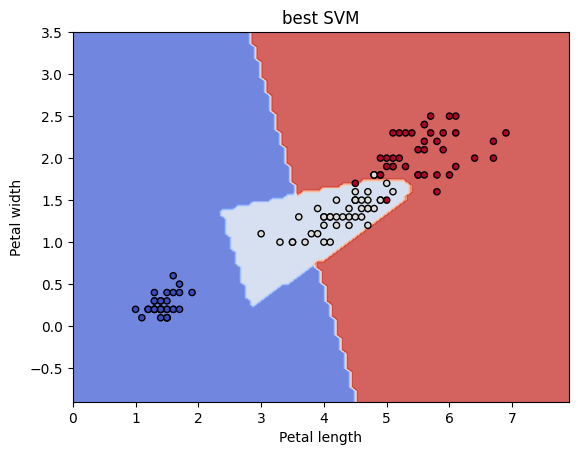

In [22]:
SVM_vizualization (clf, X_train, Y_train, "best SVM", "Petal length", "Petal width")